In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy.stats as stat

In [3]:
def Dataset(filename):
    
    data = np.genfromtxt(filename,dtype=None,missing_values=9999,filling_values=0,names=True)
    
    return data
    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


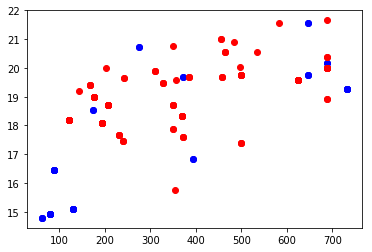

In [26]:
sne = Dataset('conreview.txt')
m2index = np.where(sne['filter'] == b'uvm2')
w1index = np.where(sne['filter'] == b'uvw1')
m2sne = sne[m2index]
w1sne = sne[w1index]
nuvbindex = np.where((m2sne['type'] == b'nuvb')&(m2sne['mag'] != 0)&(m2sne['correrr'] != 0))
nuvrindex = np.where((m2sne['type'] == b'nuvr')&(m2sne['mag'] != 0)&(m2sne['correrr'] != 0))
nuvbsne = m2sne[nuvbindex]
nuvrsne = m2sne[nuvrindex]
nuvbsne['mag'] = -2.5*np.log10(weighter(nuvbsne['name'],nuvbsne)) + 16.85
nuvrsne['mag'] = -2.5*np.log10(weighter(nuvrsne['name'],nuvrsne)) + 16.85
plt.plot(6480./np.pi/nuvbsne['aper'],nuvbsne['mag'],'bo')
plt.plot(6480./np.pi/nuvrsne['aper'],nuvrsne['mag'],'ro')

In [25]:
def weighter(names,data):
    
    values = []
    
    for i in range(len(names)):
        
        index = np.where(data['name'] == names[i])
        blah = data[index]
        weighted = np.sum(blah['corrcount']/blah['correrr'])
        unweighted = weighted / np.sum(1./blah['correrr'])
        values.append(unweighted)
        
    
    return np.asarray(values)
    

In [27]:
broadindex = np.where((m2sne['type'] == b'broad')&(m2sne['mag'] != 0))
faintindex = np.where((m2sne['type'] == b'faint')&(m2sne['mag'] != 0))
NNindex = np.where((m2sne['type'] == b'NN')&(m2sne['mag'] != 0))
broadsne = m2sne[broadindex]
faintsne = m2sne[faintindex]
NNsne = m2sne[NNindex]

broadsne['mag'] = -2.5*np.log10(weighter(broadsne['name'],broadsne)) + 16.85
faintsne['mag'] = -2.5*np.log10(weighter(faintsne['name'],faintsne)) + 16.85
NNsne['mag'] = -2.5*np.log10(weighter(NNsne['name'],NNsne)) + 16.85

uniquebroad = np.unique(broadsne['name'],return_index=True)
uniquefaint = np.unique(faintsne['name'],return_index=True)
uniqueNN = np.unique(NNsne['name'],return_index=True)
uniquenuvb = np.unique(nuvbsne['name'],return_index=True)
uniquenuvr = np.unique(nuvrsne['name'],return_index=True)

nuvbsne = nuvbsne[uniquenuvb[1]]
nuvrsne = nuvrsne[uniquenuvr[1]]
broadsne = broadsne[uniquebroad[1]]
faintsne = faintsne[uniquefaint[1]]
NNsne = NNsne[uniqueNN[1]]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [28]:
nuvbsne['mag']

array([16.82919687, 20.15187355, 15.09824833, 18.53753106, 20.74044609,
       14.79166669, 14.92961101, 16.45878443, 19.27800037, 21.55475172,
       19.76624472, 19.69565367])

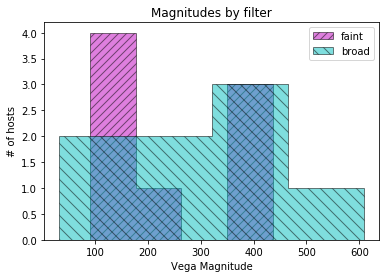

In [34]:
fig1, ax = plt.subplots(1)
N, bins, patches = ax.hist(6480./np.pi/faintsne['aper'],bins='auto',histtype='stepfilled',label='faint',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax.hist(6480./np.pi/broadsne['aper'],bins='auto',histtype='stepfilled',label='broad',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
#N, bins, patches = ax.hist(6480./np.pi/NNsne['aper'],bins='auto',histtype='stepfilled',label='Narrow Normal',alpha=0.5,color='c',edgecolor='k',hatch='----')
plt.title('Magnitudes by filter')
plt.xlabel('Vega Magnitude')
plt.ylabel('# of hosts')
ax.legend(loc='upper right')

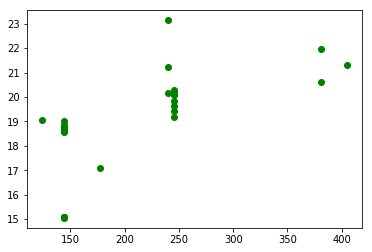

In [8]:
#plt.plot(6480./np.pi/broadsne['aper'],broadsne['mag'],'bo')
#plt.plot(6480./np.pi/faintsne['aper'],faintsne['mag'],'ro')
plt.plot(6480./np.pi/NNsne['aper'],NNsne['mag'],'go')

In [9]:
kelly = Dataset('Kellyreview.txt')
H09 = Dataset('H09review.txt')
kellym2index = np.where((kelly['filter'] == b'uvm2')&(kelly['rawcount'] > kelly ['rawerr']))
kellyw1index = np.where((kelly['filter'] == b'uvw1')&(kelly['rawcount'] > kelly ['rawerr']))
kellym2 = kelly[kellym2index]
kellyw1 = kelly[kellyw1index]
kellydata = Dataset('keldat.txt')
kellym2['mag'] = -2.5*np.log10(weighter(kellym2['name'],kellym2)) + 16.85
kellyw1['mag'] = -2.5*np.log10(weighter(kellyw1['name'],kellyw1)) + 17.44
kellym2['magerr'] = -2.5*np.log10(weighter(kellym2['name'],kellym2) - kellym2['rawerr']) + 16.85 - kellym2['mag']
kellyw1['magerr'] = -2.5*np.log10(weighter(kellyw1['name'],kellyw1) - kellyw1['rawerr']) + 17.44 - kellyw1['mag']
unique1 = np.unique(kellyw1['name'],return_index=True)
kellyw1 = kellyw1[unique1[1]]
unique2 = np.unique(kellym2['name'],return_index=True)
kellym2 = kellym2[unique2[1]]

H09m2index = np.where((H09['filter'] == b'uvm2')&(H09['rawcount'] > H09['rawerr']))
H09w1index = np.where((H09['filter'] == b'uvw1')&(H09['rawcount'] > H09['rawerr']))
H09m2 = H09[H09m2index]
H09w1 = H09[H09w1index]
H09data = Dataset('H09dat2.txt')
H09m2['mag'] = -2.5*np.log10(weighter(H09m2['name'],H09m2)) + 16.85
H09w1['mag'] = -2.5*np.log10(weighter(H09w1['name'],H09w1)) + 17.44
H09m2['magerr'] = -2.5*np.log10(weighter(H09m2['name'],H09m2) - H09m2['rawerr']) + 16.85 - H09m2['mag']
H09w1['magerr'] = -2.5*np.log10(weighter(H09w1['name'],H09w1) - H09w1['rawerr']) + 17.44 - H09w1['mag']

unique1 = np.unique(H09w1['name'],return_index=True)
H09w1 = H09w1[unique1[1]]
unique2 = np.unique(H09m2['name'],return_index=True)
H09m2 = H09m2[unique2[1]]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


0.8631700782328755 -5.458456294439092 0.8484766706659446 0.0019127656641384503 0.19035233870369234
0.9990352463148711 -8.202802579080874 0.924708355395152 0.00012828508017028486 0.14540752853290662


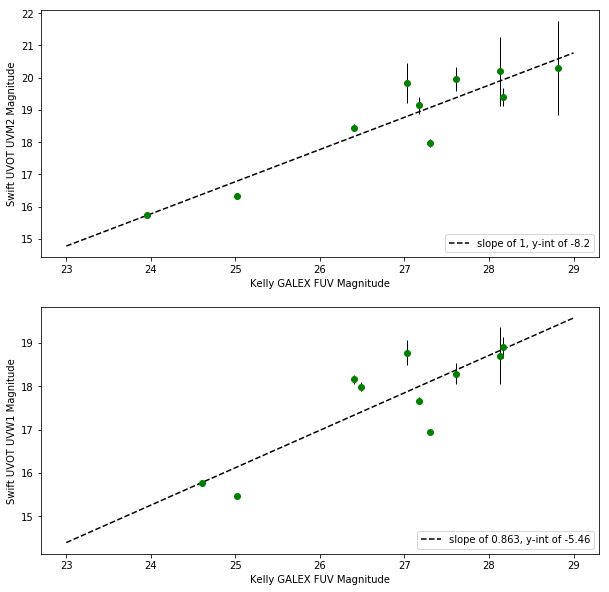

In [12]:
oofw = np.intersect1d(kellyw1['name'],kellydata['name'],return_indices=True)
boofw = np.intersect1d(H09w1['name'],H09data['name'],return_indices=True)
oofm = np.intersect1d(kellym2['name'],kellydata['name'],return_indices=True)
boofm = np.intersect1d(H09m2['name'],H09data['name'],return_indices=True)
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
keldatmagw = kellydata['mag'][oofw[2]]
keldatmagm = kellydata['mag'][oofm[2]]
kellyw1mag = kellyw1[oofw[1]]
kellym2mag = kellym2[oofm[1]]
ax1.errorbar(keldatmagm,kellym2mag['mag'],yerr=kellym2mag['magerr'],fmt='go',ecolor='black',elinewidth=1)
ax2.errorbar(keldatmagw,kellyw1mag['mag'],yerr=kellyw1mag['magerr'],fmt='go',ecolor='black',elinewidth=1)
m,yint,r,p,sig = stat.linregress(keldatmagw,kellyw1mag['mag'])
x = np.arange(23,30,1)
y = m*x + yint
ax2.plot(x,y,'k--',label='slope of 0.863, y-int of -5.46')
m2,yint2,r2,p2,sig2 = stat.linregress(keldatmagm,kellym2mag['mag'])
x2 = np.arange(23,30,1)
y2 = m2*x2 + yint2
ax1.plot(x2,y2,'k--',label='slope of 1, y-int of -8.2')
ax1.set_xlabel('Kelly GALEX FUV Magnitude')
ax2.set_xlabel('Kelly GALEX FUV Magnitude')
ax1.set_ylabel('Swift UVOT UVM2 Magnitude')
ax2.set_ylabel('Swift UVOT UVW1 Magnitude')
ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
print(m,yint,r,p,sig)
print(m2,yint2,r2,p2,sig2)
#kellym2['name']
#kellydata2 = kellydata[np.where(kellydata['name'] == kellym2['name'])]
#plt.plot(kellydata2['mag'],kellym2[unique[1]],'go')
#kellym2[unique[1]]
#kellydata
#kellydata2

0.4004352623832302 11.870090657448294 0.5990050013345143 0.0019822371557803716 0.11412608375335061
0.5298883371216648 9.645035785499823 0.7254945190372291 0.0006553617153471084 0.12566737281123835


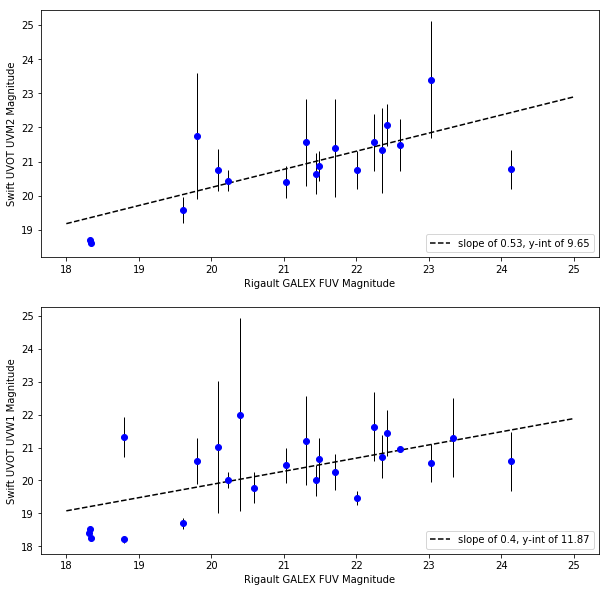

In [13]:
H09datmagw = H09data['mag'][boofw[2]]
H09w1mag = H09w1[boofw[1]]
H09datmagm = H09data['mag'][boofm[2]]
H09m2mag = H09m2[boofm[1]]
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.errorbar(H09datmagm,H09m2mag['mag'],yerr=H09m2mag['magerr'],fmt='bo',ecolor='black',elinewidth=1)
ax2.errorbar(H09datmagw,H09w1mag['mag'],yerr=H09w1mag['magerr'],fmt='bo',ecolor='black',elinewidth=1)
#ax.xaxis.set_major_locator(plt.MaxNLocator(8))
m,yint,r,p,sig = stat.linregress(H09datmagw,H09w1mag['mag'])
x = np.arange(18,26,1)
y = m*x + yint
m2,yint2,r2,p2,sig2 = stat.linregress(H09datmagm,H09m2mag['mag'])
x2 = np.arange(18,26,1)
y2 = m2*x2 + yint2
ax2.plot(x,y,'k--',label='slope of 0.4, y-int of 11.87')
ax2.set_xlabel('Rigault GALEX FUV Magnitude')
ax2.set_ylabel('Swift UVOT UVW1 Magnitude')
ax2.legend(loc='lower right')
ax1.plot(x2,y2,'k--',label='slope of 0.53, y-int of 9.65')
ax1.set_xlabel('Rigault GALEX FUV Magnitude')
ax1.set_ylabel('Swift UVOT UVM2 Magnitude')
ax1.legend(loc='lower right')
print(m,yint,r,p,sig)
print(m2,yint2,r2,p2,sig2)

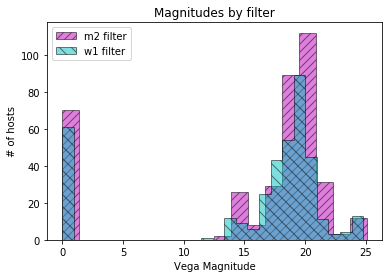

In [14]:
fig1, ax = plt.subplots(1)
N, bins, patches = ax.hist(m2sne['mag'],bins='fd',histtype='stepfilled',label='m2 filter',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax.hist(w1sne['mag'],bins='fd',histtype='stepfilled',label='w1 filter',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
plt.title('Magnitudes by filter')
plt.xlabel('Vega Magnitude')
plt.ylabel('# of hosts')
ax.legend(loc='upper left')

In [ ]:
fig1, ax = plt.subplots(1)
N, bins, patches = ax.hist(,bins='fd',histtype='stepfilled',label='m2 filter',alpha=0.5,color='m',edgecolor='k',hatch='///')
N, bins, patches = ax.hist(,bins='fd',histtype='stepfilled',label='w1 filter',alpha=0.5,color='c',edgecolor='k',hatch='\\\\')
plt.title('Magnitudes by filter')
plt.xlabel('Vega Magnitude')
plt.ylabel('# of hosts')
ax.legend(loc='upper left')